In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/2024_ ND1 Reports - KABS.csv'
data = pd.read_csv(file_path)

In [5]:
# Display basic information about the dataset
def dataset_summary(data):
    print("Dataset Shape:", data.shape)
    print("Missing Values:\n", data.isnull().sum())
    #print("Summary :", data.describe())

dataset_summary(data)

Dataset Shape: (9800, 29)
Missing Values:
 County                                        0
Sub-County                                    0
Ward                                          0
Sub location                               9800
Latitude                                    676
Longitude                                   672
Locality                                      0
Date of Start of Outbreak/Event               0
Month                                         0
Year                                          0
Unnamed: 10                                9800
Date Report                                   0
Month.1                                       0
Date of Start of Outbreak/Event.1             0
Disease/ Condition                           24
Nature of Diagnosis                           0
Test Used                                  9710
Species Affected                              0
Number at Risk                                0
Number Sick                                  

In [6]:
# Focus columns
focus_columns = [
    "County", "Disease/ Condition", "Number at Risk", "Number Sick", "Number Dead",
    "Number of Humans Affected (If zoonosis)", "Latitude", "Longitude"
]
data_focus = data[focus_columns]

In [7]:
data_focus.head(10)

,County,Disease/ Condition,Number at Risk,Number Sick,Number Dead,Number of Humans Affected (If zoonosis),Latitude,Longitude
0,Baringo,Anaplasmosis,2,1,0,0.0,-0.046726,36.182539
1,Baringo,Foot and Mouth Disease (FMD),5,3,0,0.0,0.718697,35.696828
2,Baringo,Anaplasmosis,3,2,0,0.0,0.593602,35.851682
3,Marsabit,Wound,10,3,0,0.0,NaN,NaN
4,Busia,Pneumonia,1,1,0,0.0,NaN,NaN
5,Baringo,Helminthiasis,6,2,0,0.0,0.470579,35.857475
6,Baringo,Coccidosis,2,1,0,0.0,0.653439,35.515329
7,Marsabit,Fracture,7,1,0,0.0,NaN,NaN
8,Baringo,Helminthiasis,0,1,0,0.0,0.649318,35.516013
9,Makueni,Pneumonia,4,1,0,NaN,0.000000,0.000000


In [8]:
# Clean the data
data_focus = data_focus.dropna(subset=["Disease/ Condition", "Number at Risk", "Number Sick", "Number Dead"])
data_focus["Number of Humans Affected (If zoonosis)"] = data_focus["Number of Humans Affected (If zoonosis)"].fillna(0)


In [9]:
data_focus = data_focus.copy()
data_focus["Number of Humans Affected (If zoonosis)"] = data_focus["Number of Humans Affected (If zoonosis)"].fillna(0)

In [10]:
# Overview of key statistics
summary = data_focus.describe()
print("Summary Statistics:\n", summary)

Summary Statistics:
        Number at Risk  Number Sick  Number Dead  \
count     9776.000000  9776.000000  9776.000000   
mean        49.408347     4.791223     0.743044   
std        279.949160    22.780862     5.746428   
min          0.000000     0.000000     0.000000   
25%          2.000000     1.000000     0.000000   
50%          7.000000     2.000000     0.000000   
75%         36.000000     3.000000     0.000000   
max      15000.000000  1000.000000   350.000000   

       Number of Humans Affected (If zoonosis)      Latitude     Longitude  
count                              9776.000000  9.101000e+03  9.105000e+03  
mean                                  0.074877  5.417309e+03  1.271292e+06  
std                                   4.573013  3.659100e+05  5.947463e+07  
min                                   0.000000 -4.850823e+06 -9.343575e+06  
25%                                   0.000000 -1.899693e+00  3.616358e+01  
50%                                   0.000000  1.157498e

In [11]:
# Total numbers at a glance
def total_numbers(data):
    print("Total Number at Risk:", data["Number at Risk"].sum())
    print("Total Number Sick:", data["Number Sick"].sum())
    print("Total Number Dead:", data["Number Dead"].sum())
    print("Total Number of Humans Affected:", data["Number of Humans Affected (If zoonosis)"].sum())

total_numbers(data_focus)

Total Number at Risk: 483016
Total Number Sick: 46839
Total Number Dead: 7264
Total Number of Humans Affected: 732.0


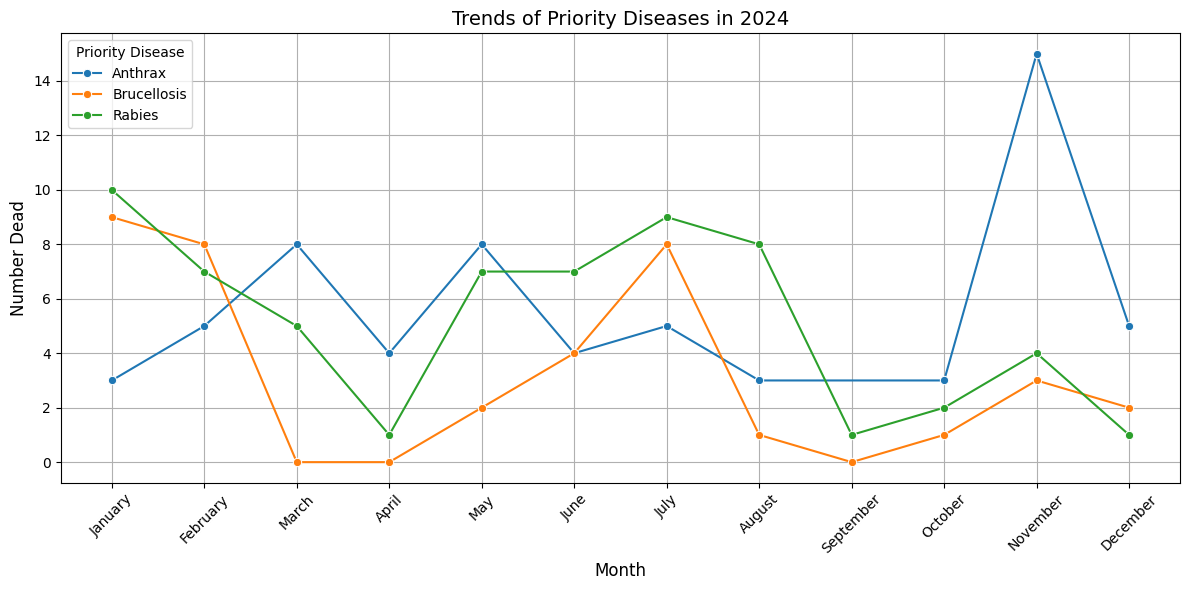

In [23]:
priority_diseases_list = ["Anthrax", "Rift Valley Fever", "Brucellosis", "Rabies"]
priority_disease_trends = data_focus[data_focus["Disease/ Condition"].isin(priority_diseases_list)]

# combining 'Year' and 'Month'
priority_disease_trends['Date'] = pd.to_datetime(priority_disease_trends['Year'].astype(str) + '-' + priority_disease_trends['Month'].astype(str))

# Filter
trends_2024 = priority_disease_trends[priority_disease_trends['Date'].dt.year == 2024]

# Extract month from the Date column
trends_2024['Month'] = trends_2024['Date'].dt.month_name()
trends_2024['priority_diseases'] = trends_2024['Disease/ Condition']

# Group by Date and Disease
trends_data = trends_2024.groupby(['Month', 'priority_diseases'])['Number Dead'].sum().reset_index()

# Order months
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Set the Month column as a categorical type to ensure proper sorting
trends_data['Month'] = pd.Categorical(trends_data['Month'], categories=month_order, ordered=True)

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=trends_data, x='Month', y='Number Dead', hue='priority_diseases', marker="o")
plt.title("Trends of Priority Diseases in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number Dead", fontsize=12)
plt.legend(title="Priority Disease", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

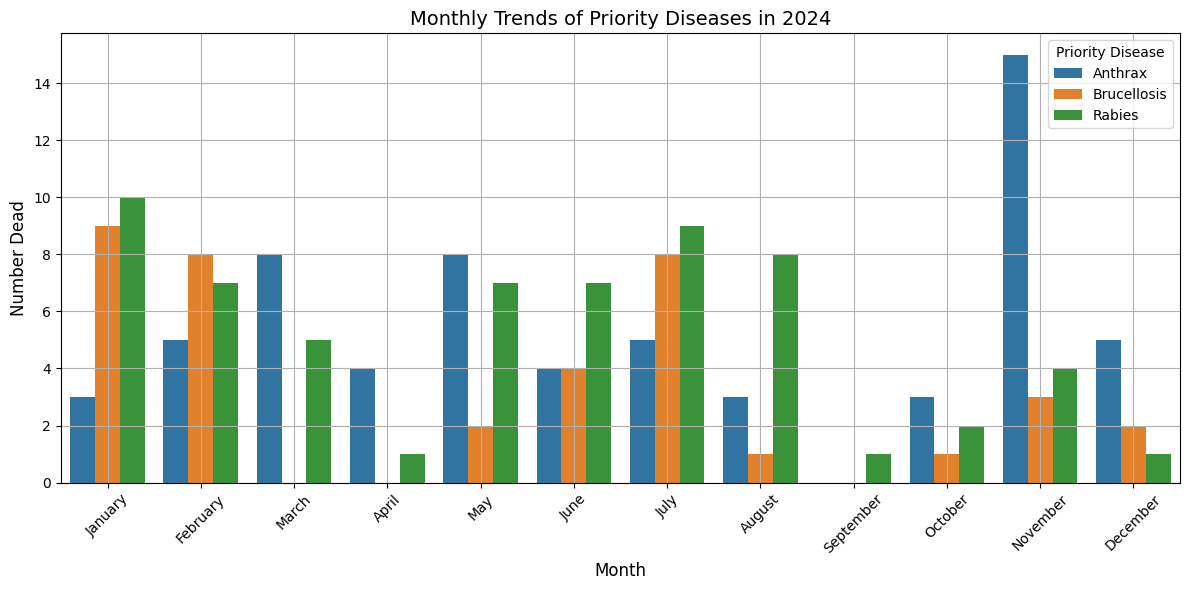

In [24]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=trends_data, x='Month', y='Number Dead', hue='priority_diseases', ci=None)

# Customize the plot
plt.title("Monthly Trends of Priority Diseases in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number Dead", fontsize=12)
plt.legend(title="Priority Disease", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

#plot
plt.show()

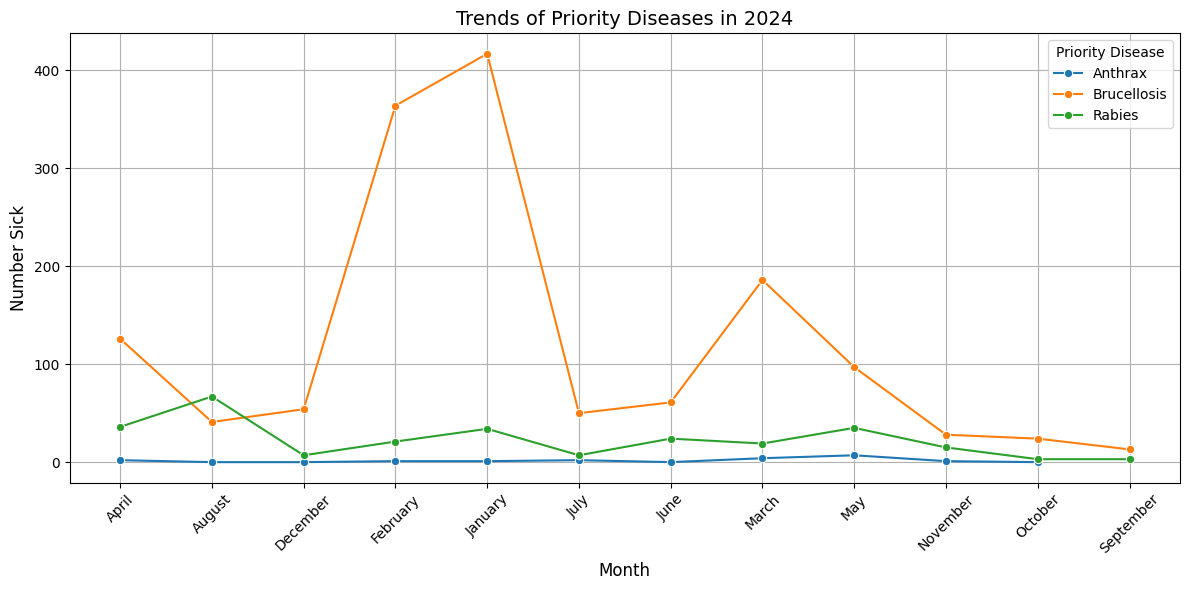

In [25]:
# Group by Date and Disease to calculate total Number Dead over time
trends_data = trends_2024.groupby(['Month', 'priority_diseases'])['Number Sick'].sum().reset_index()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=trends_data, x='Month', y='Number Sick', hue='priority_diseases', marker="o")
plt.title("Trends of Priority Diseases in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number Sick", fontsize=12)
plt.legend(title="Priority Disease", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


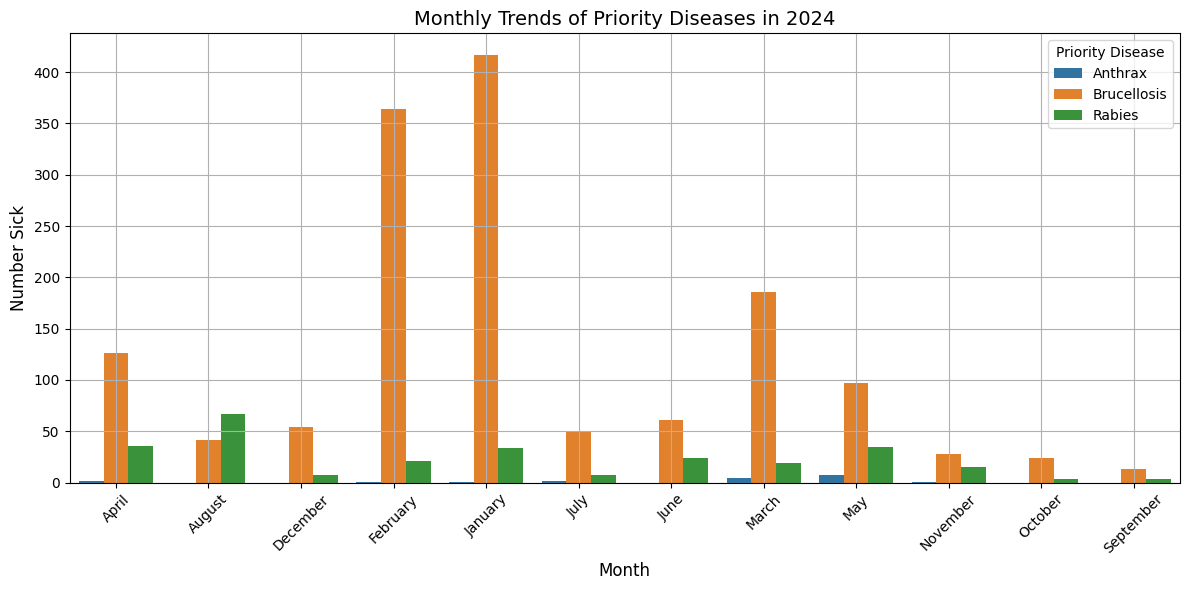

In [26]:
trends_data = trends_2024.groupby(['Month', 'priority_diseases'])['Number Sick'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=trends_data, x='Month', y='Number Sick', hue='priority_diseases', ci=None)

# Customize the plot
plt.title("Monthly Trends of Priority Diseases in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number Sick", fontsize=12)
plt.legend(title="Priority Disease", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()

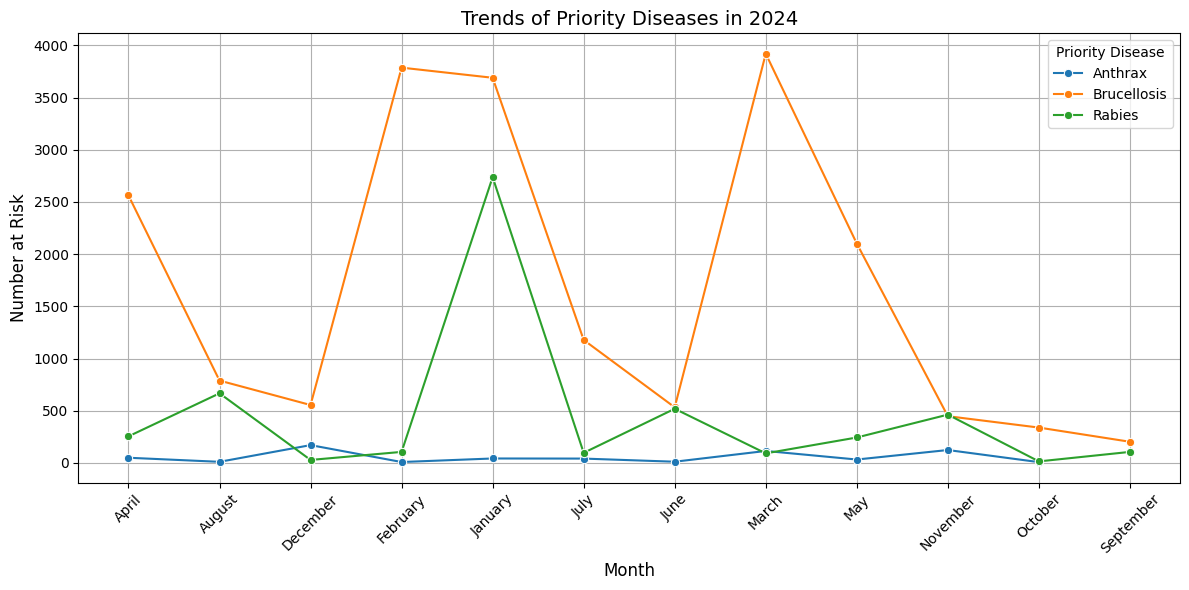

In [27]:
# Group by Date and Disease to calculate total Number Dead over time
trends_data = trends_2024.groupby(['Month', 'priority_diseases'])['Number at Risk'].sum().reset_index()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=trends_data, x='Month', y='Number at Risk', hue='priority_diseases', marker="o")
plt.title("Trends of Priority Diseases in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number at Risk", fontsize=12)
plt.legend(title="Priority Disease", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


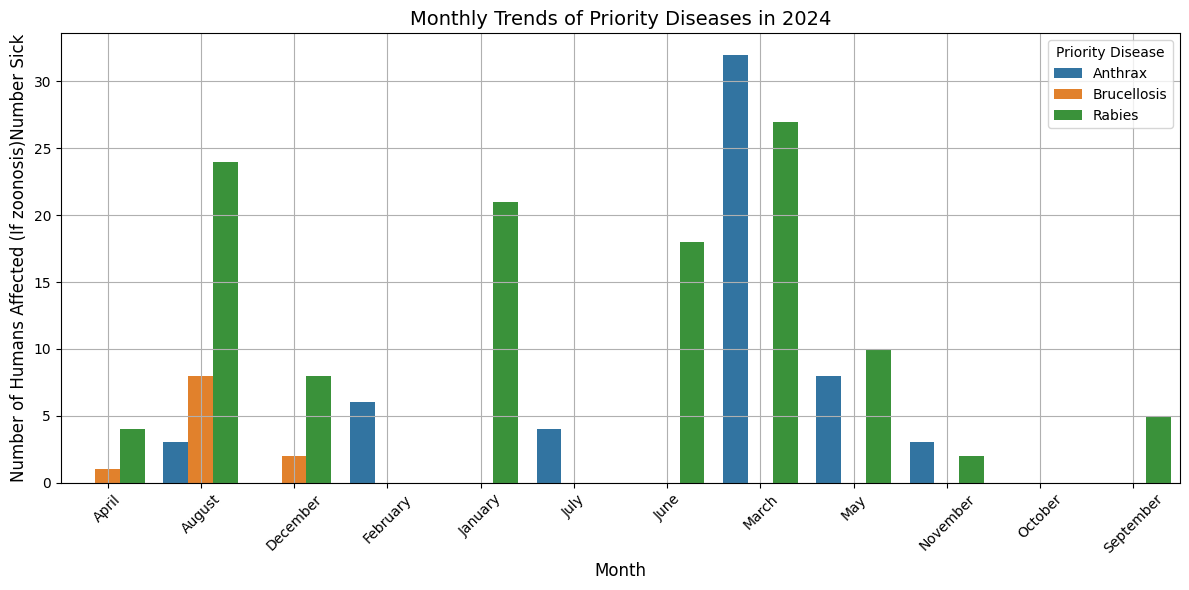

In [28]:
# Group by Date and Disease to calculate total Number Dead over time
trends_data = trends_2024.groupby(['Month', 'priority_diseases'])['Number of Humans Affected (If zoonosis)'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=trends_data, x='Month', y='Number of Humans Affected (If zoonosis)', hue='priority_diseases', ci=None)

# Customize the plot
plt.title("Monthly Trends of Priority Diseases in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Humans Affected (If zoonosis)Number Sick", fontsize=12)
plt.legend(title="Priority Disease", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()

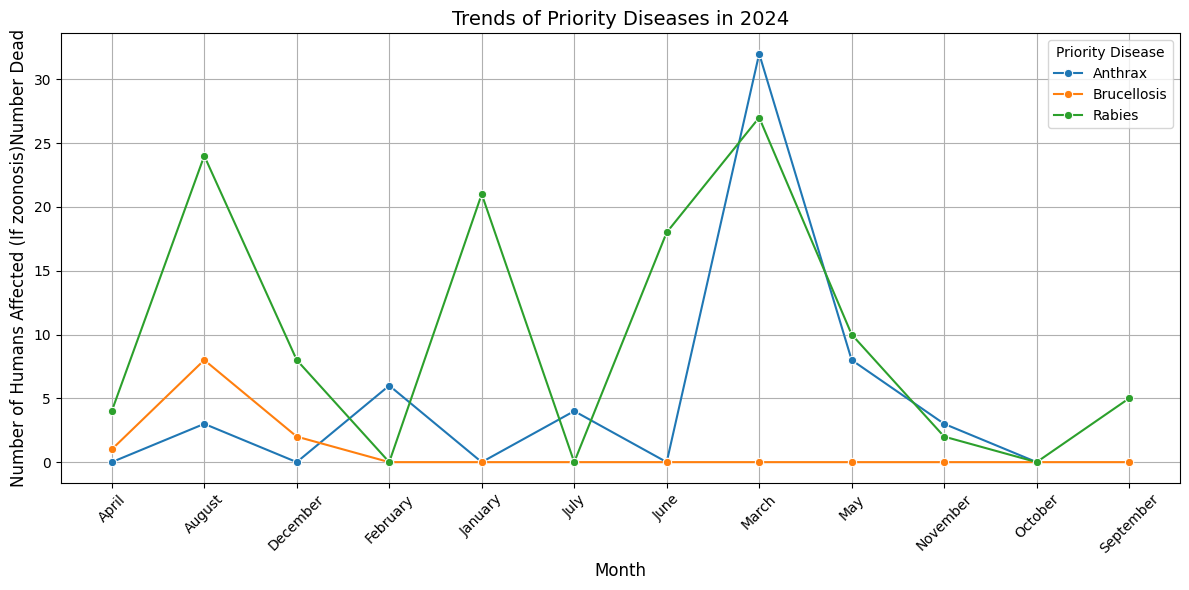

In [29]:
# Group by Date and Disease to calculate total Number Dead over time
trends_data = trends_2024.groupby(['Month', 'priority_diseases'])['Number of Humans Affected (If zoonosis)'].sum().reset_index()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=trends_data, x='Month', y='Number of Humans Affected (If zoonosis)', hue='priority_diseases', marker="o")
plt.title("Trends of Priority Diseases in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Humans Affected (If zoonosis)Number Dead", fontsize=12)
plt.legend(title="Priority Disease", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


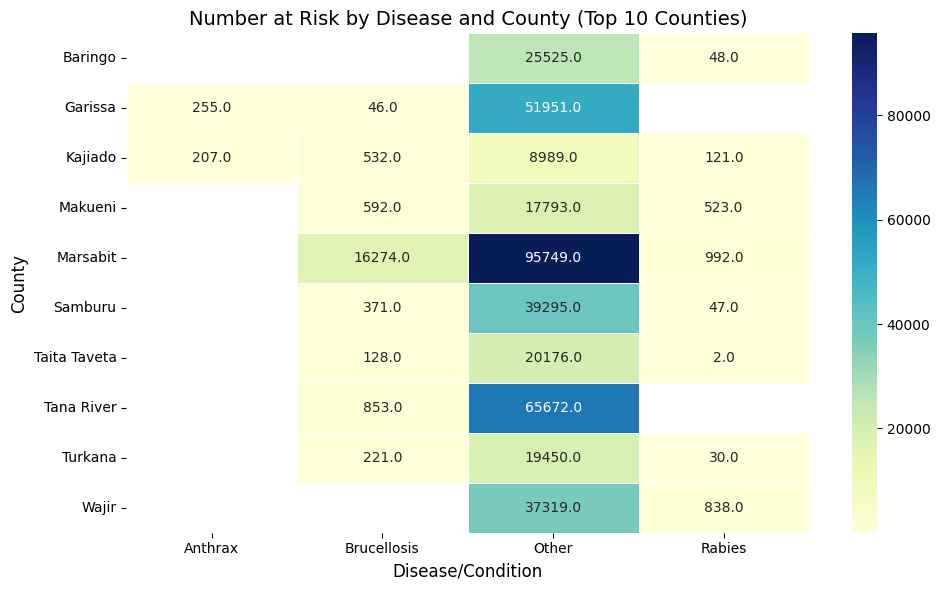

In [31]:

priority_diseases_list = ["Anthrax", "Rift Valley Fever", "Brucellosis", "Rabies"]
data_focus['priority_diseases'] = data_focus['Disease/ Condition'].apply(lambda x: x if x in priority_diseases_list else 'Other')

# Calculate total 'Number at Risk' for each county
county_risk = data_focus.groupby('County')['Number at Risk'].sum().sort_values(ascending=False)

# Top 10 counties
top_10_counties = county_risk.head(10).index

# Filter data_focus to include only top 10 counties
filtered_data = data_focus[data_focus['County'].isin(top_10_counties)]

# Create pivot table using filtered data
pivot = filtered_data.pivot_table(
    index="County",
    columns="priority_diseases",
    values="Number at Risk",
    aggfunc='sum'
)

# Plotting the heatmap
# Plotting the heatmap with an updated color palette
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Number at Risk by Disease and County (Top 10 Counties)", fontsize=14)
plt.xlabel("Disease/Condition", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.tight_layout()
plt.show()


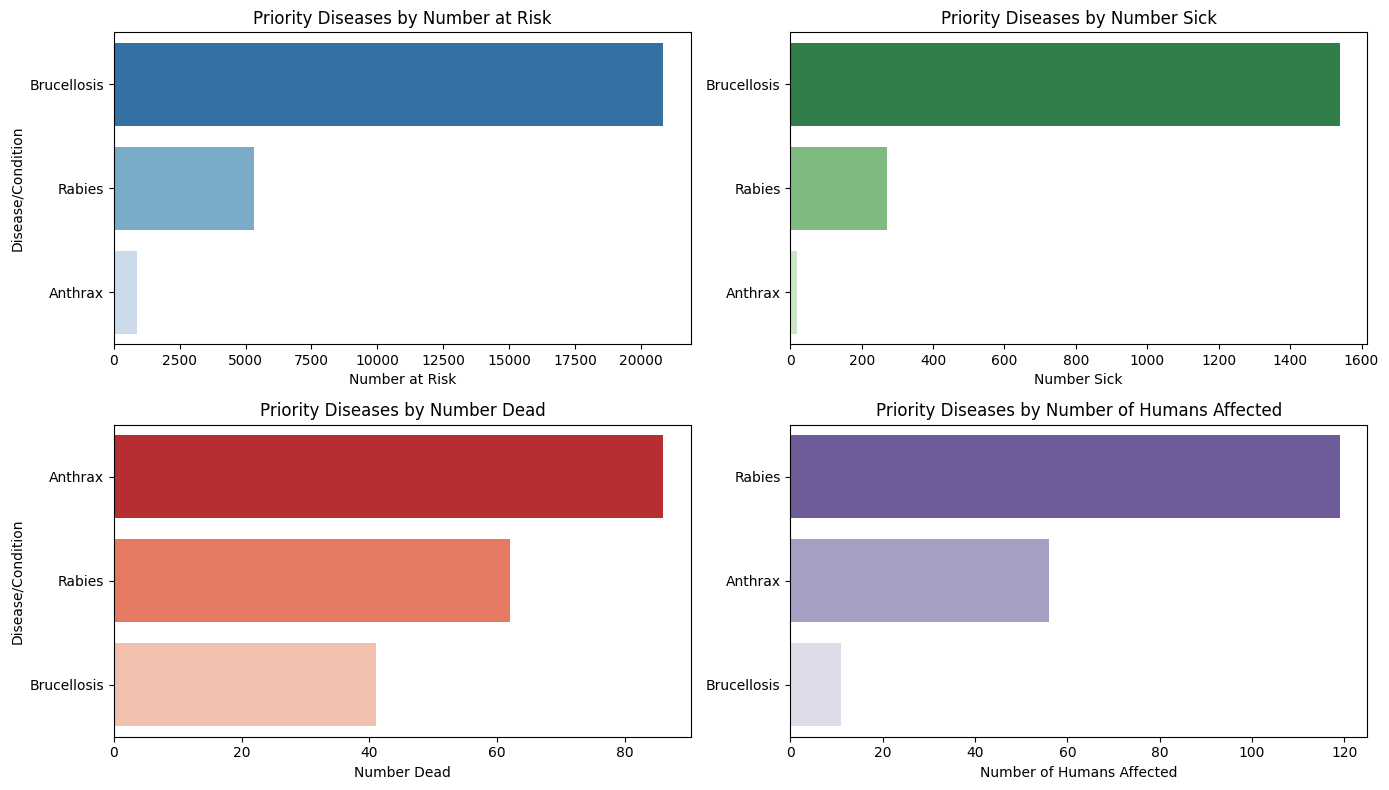

In [32]:


priority_diseases = ["Anthrax", "Rift Valley Fever", "Brucellosis", "Rabies"]
priority_data = data_focus[data_focus["Disease/ Condition"].isin(priority_diseases)]
priority_grouped = priority_data.groupby("Disease/ Condition").sum(numeric_only=True).reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot for 'Number at Risk'
sns.barplot(data=priority_grouped.sort_values(by="Number at Risk", ascending=False),
            x="Number at Risk", y="Disease/ Condition", palette="Blues_r", ax=axes[0, 0])
axes[0, 0].set_title("Priority Diseases by Number at Risk")
axes[0, 0].set_xlabel("Number at Risk")
axes[0, 0].set_ylabel("Disease/Condition")

# Plot for 'Number Sick'
sns.barplot(data=priority_grouped.sort_values(by="Number Sick", ascending=False),
            x="Number Sick", y="Disease/ Condition", palette="Greens_r", ax=axes[0, 1])
axes[0, 1].set_title("Priority Diseases by Number Sick")
axes[0, 1].set_xlabel("Number Sick")
axes[0, 1].set_ylabel("")

# Plot for 'Number Dead'
sns.barplot(data=priority_grouped.sort_values(by="Number Dead", ascending=False),
            x="Number Dead", y="Disease/ Condition", palette="Reds_r", ax=axes[1, 0])
axes[1, 0].set_title("Priority Diseases by Number Dead")
axes[1, 0].set_xlabel("Number Dead")
axes[1, 0].set_ylabel("Disease/Condition")

# Plot for 'Number of Humans Affected (If zoonosis)'
sns.barplot(data=priority_grouped.sort_values(by="Number of Humans Affected (If zoonosis)", ascending=False),
            x="Number of Humans Affected (If zoonosis)", y="Disease/ Condition", palette="Purples_r", ax=axes[1, 1])
axes[1, 1].set_title("Priority Diseases by Number of Humans Affected")
axes[1, 1].set_xlabel("Number of Humans Affected")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

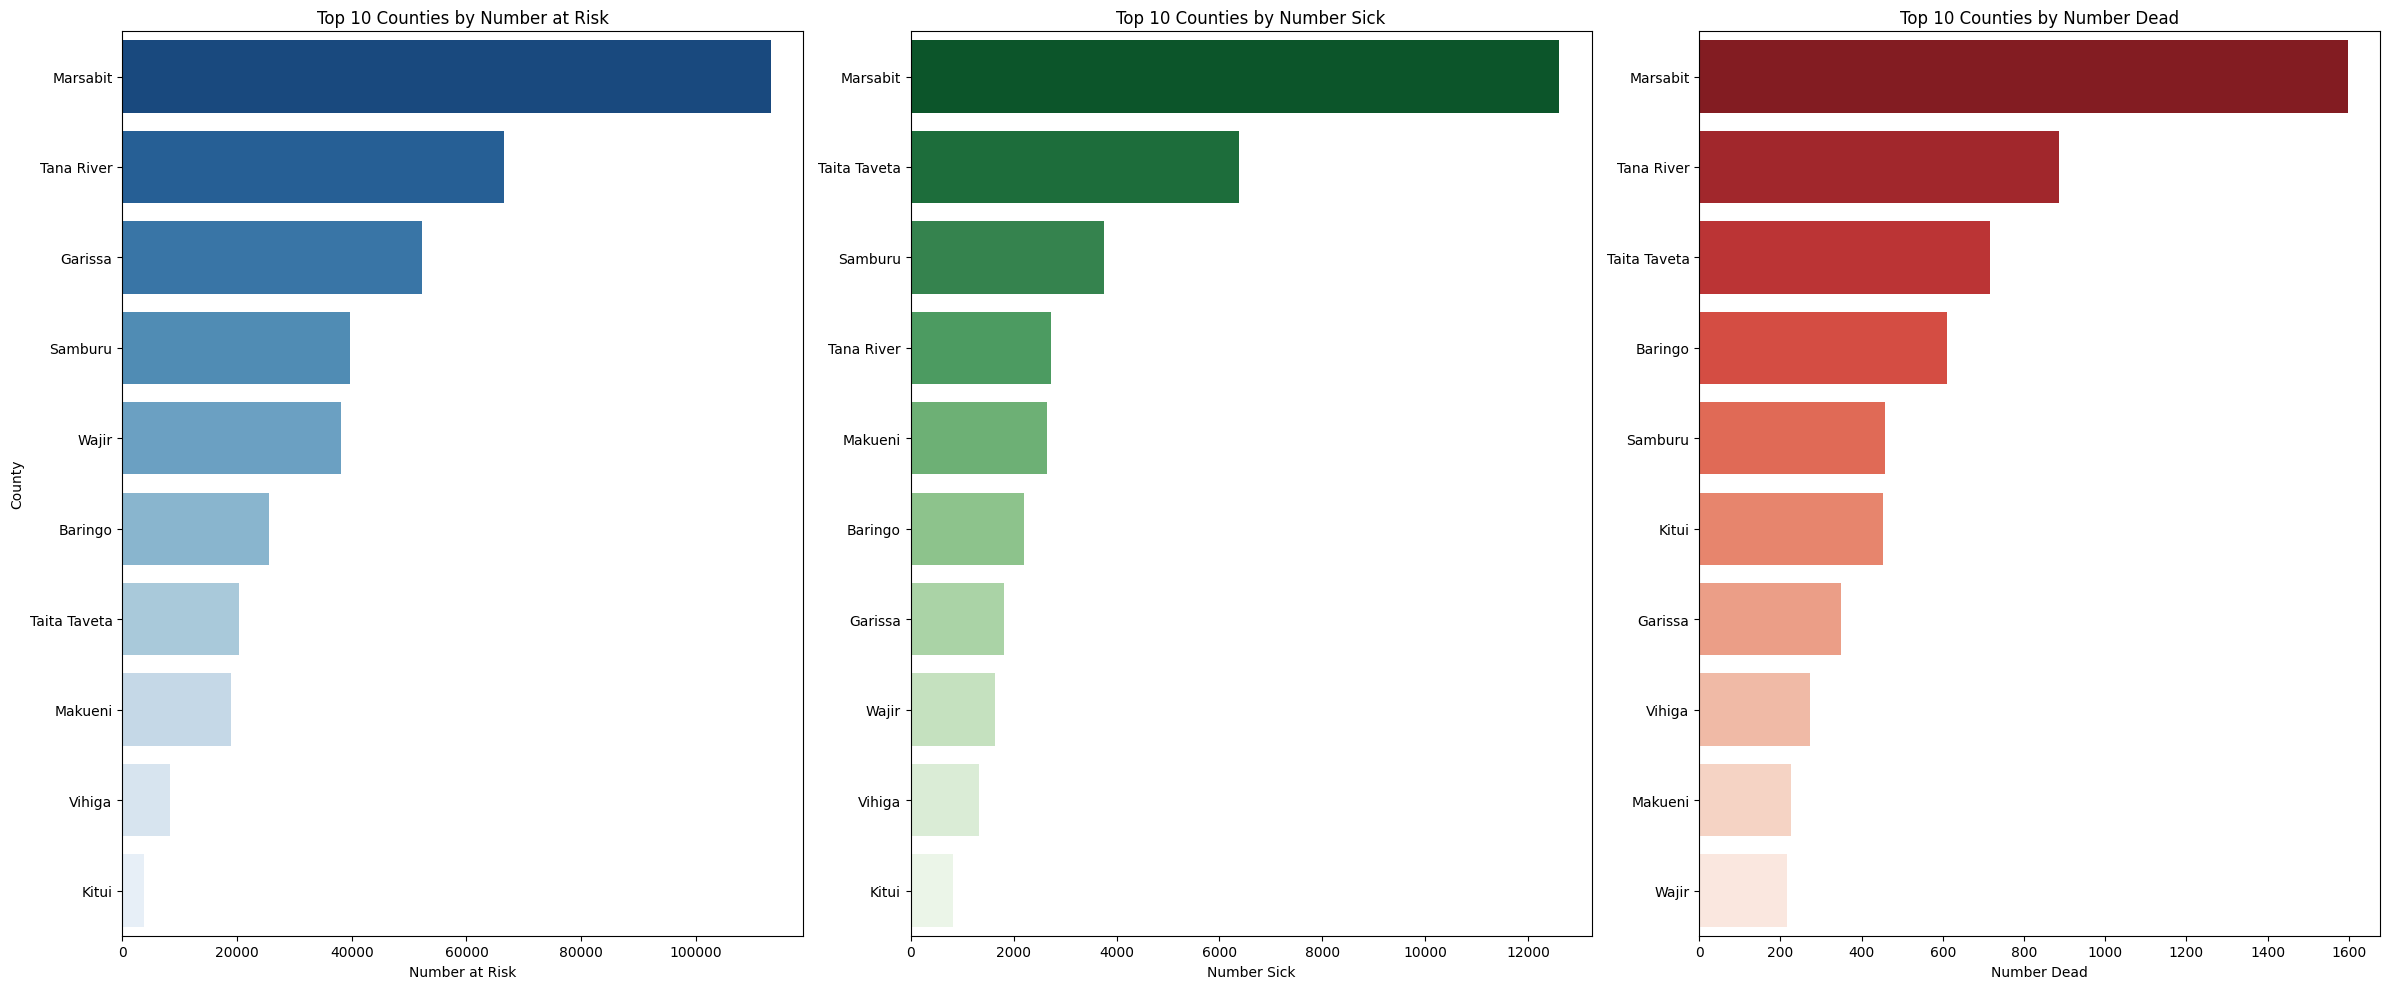

In [33]:
def location_analysis(data):
    county_grouped = data.groupby("County").sum(numeric_only=True).reset_index()
    top_10_counties = county_grouped.sort_values(by="Number Dead", ascending=False).head(10)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(24, 10))

    # Plot for Number at Risk
    sns.barplot(data=top_10_counties, x="Number at Risk", y="County",
                palette="Blues_r", ax=axes[0],
                order=top_10_counties.sort_values(by="Number at Risk", ascending=False)["County"])
    axes[0].set_title("Top 10 Counties by Number at Risk")
    axes[0].set_xlabel("Number at Risk")
    axes[0].set_ylabel("County")

    # Plot for Number Sick
    sns.barplot(data=top_10_counties, x="Number Sick", y="County",
                palette="Greens_r", ax=axes[1],
                order=top_10_counties.sort_values(by="Number Sick", ascending=False)["County"])
    axes[1].set_title("Top 10 Counties by Number Sick")
    axes[1].set_xlabel("Number Sick")
    axes[1].set_ylabel("")

    # Plot for Number Dead
    sns.barplot(data=top_10_counties, x="Number Dead", y="County",
                palette="Reds_r", ax=axes[2],
                order=top_10_counties.sort_values(by="Number Dead", ascending=False)["County"])
    axes[2].set_title("Top 10 Counties by Number Dead")
    axes[2].set_xlabel("Number Dead")
    axes[2].set_ylabel("")

    plt.tight_layout()
    plt.show()

location_analysis(data_focus)

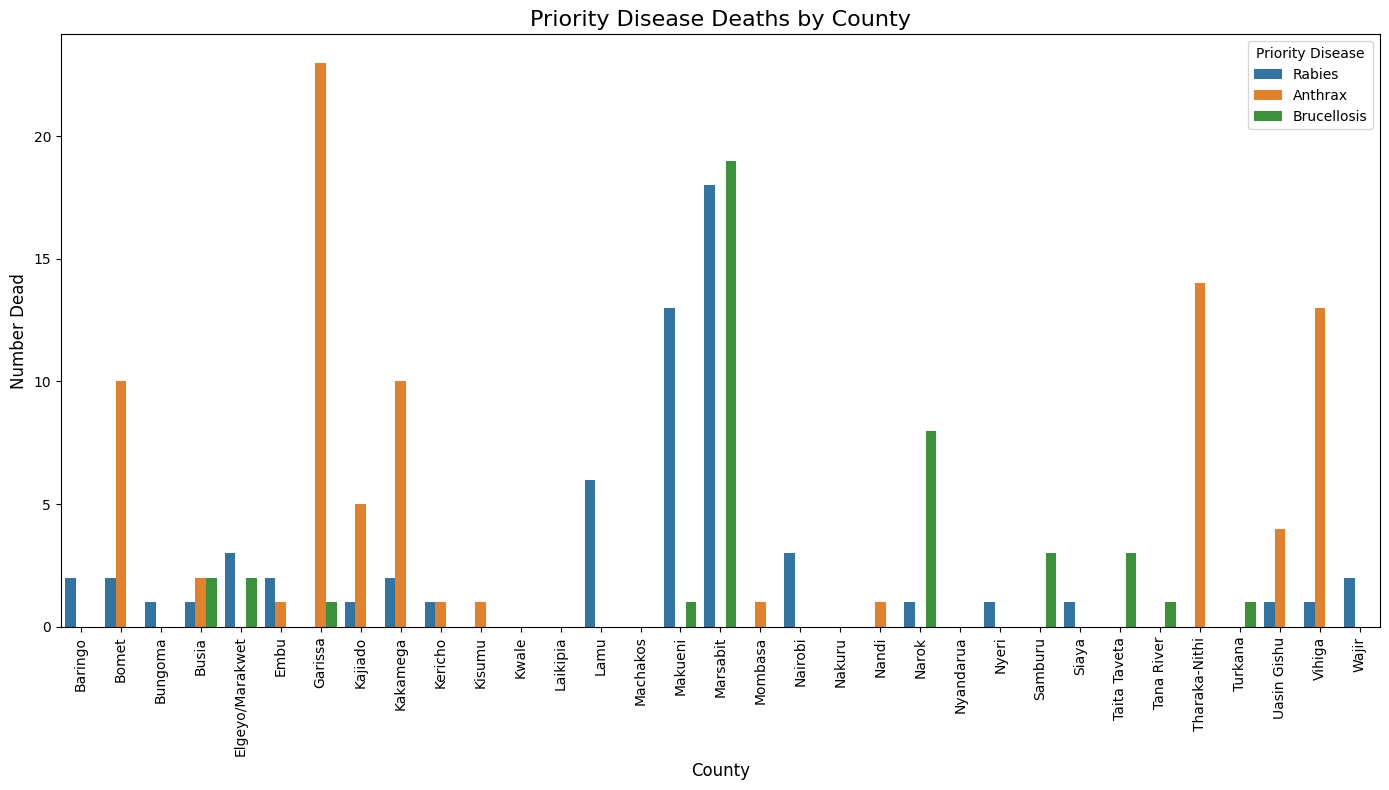

In [35]:
# Group by County and Disease to calculate total Number Dead
if 'priority_diseases' not in priority_disease_trends.columns:
    priority_disease_trends['priority_diseases'] = priority_disease_trends['Disease/ Condition'].apply(lambda x: x if x in priority_diseases_list else 'Other')

county_disease_data = priority_disease_trends.groupby(['County', 'priority_diseases'])['Number Dead'].sum().reset_index()

# Plot the trends
plt.figure(figsize=(14, 8))
sns.barplot(data=county_disease_data, x='County', y='Number Dead', hue='priority_diseases', ci=None)

plt.title("Priority Disease Deaths by County", fontsize=16)
plt.xlabel("County", fontsize=12)
plt.ylabel("Number Dead", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Priority Disease", fontsize=10)
plt.tight_layout()


plt.show()

# Machine Learning

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline



In [66]:
# Load data
data = data_focus.copy()  # Create a copy to avoid modifying the original DataFrame

# Handle missing data
data['Number of Humans Affected (If zoonosis)'] = data['Number of Humans Affected (If zoonosis)'].fillna(
    data['Number of Humans Affected (If zoonosis)'].mean())
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())

# Encode categorical features using one-hot encoding
categorical_features = ['County', 'Disease/ Condition']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
data = data.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_df], axis=1)

# Define X and y
X = data[['Number at Risk', 'Number Sick', 'Number Dead', 'Latitude', 'Longitude'] +
         [col for col in data.columns if col.startswith('County_') or col.startswith('Disease/ Condition_')]]
y = data['Number of Humans Affected (If zoonosis)']

X = X[y.notna()]
y = y[y.notna()]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
# Make predictions
y_pred = model.predict(X_test)
pred_list = y_pred.tolist()
print("Predictions:", pred_list)

Predictions: [0.04, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.07, 0.07, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.04, 0.34, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.07, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.07, 0.12, 0.04, 0.05, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.04, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.07, 0.04, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.07, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.06, 0.04, 0.12, 0.04, 0.04, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.06, 0.04, 0.

In [53]:
county = data_focus['County'].unique()
print(county)

['Baringo' 'Marsabit' 'Busia' 'Makueni' 'Kiambu' 'Laikipia' 'Taita Taveta'
 'Bomet' 'Vihiga' 'Elgeyo/Marakwet' 'Bungoma' 'Narok' 'Garissa' 'Kajiado'
 'Kakamega' 'Turkana' 'Kericho' 'Kirinyaga' 'Kisumu' 'Kitui' 'Kwale'
 'Machakos' 'Samburu' 'Mombasa' 'Nairobi' 'Nakuru' 'Nandi' 'Nyamira'
 'Nyandarua' 'Nyeri' 'Tana River' 'Siaya' 'Meru' 'Kilifi' 'Uasin Gishu'
 'Tharaka-Nithi' 'Trans Nzoia' 'Wajir' 'Lamu' 'West Pokot' 'Migori'
 'Isiolo' 'Embu' 'Homa Bay']


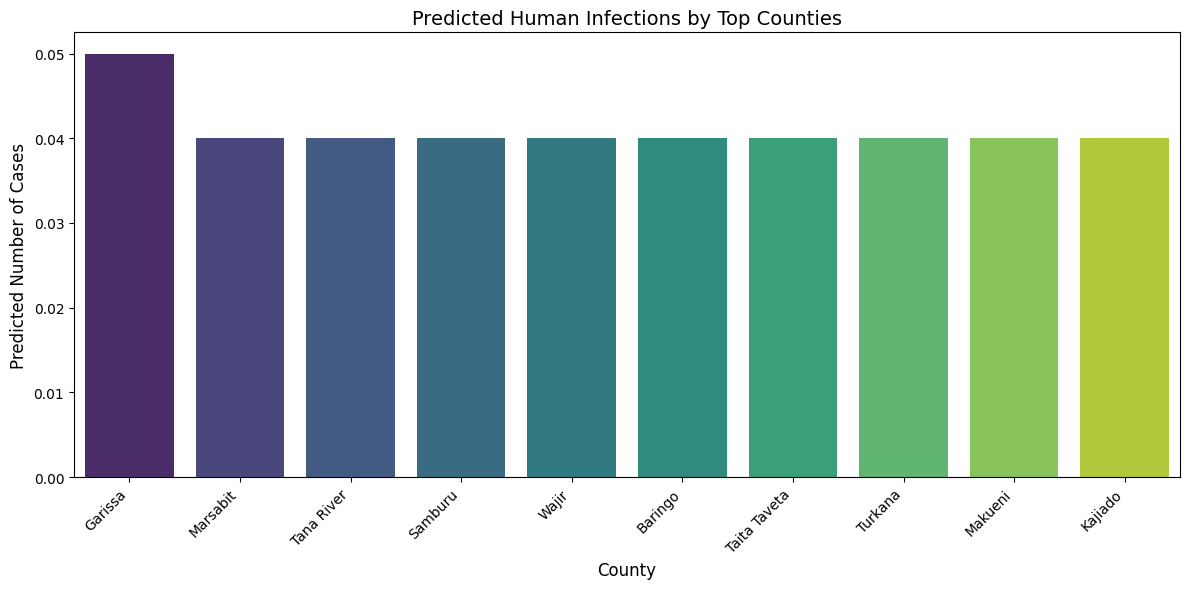

In [54]:
# Adjust pred_list to match the length of top_counties
# Calculate total 'Number at Risk' for each county and get the top 10
county_risk = data_focus.groupby('County')['Number at Risk'].sum().sort_values(ascending=False)
top_counties = county_risk.head(10).index

pred_list_adjusted = pred_list[:len(top_counties)]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'County': top_counties, 'Predicted Cases': pred_list_adjusted})

# Sort the DataFrame by 'Predicted Cases' in descending order
plot_data = plot_data.sort_values(by=['Predicted Cases'], ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='County', y='Predicted Cases', palette="viridis", order=plot_data['County']) # Use 'order' to specify the order of bars
plt.title("Predicted Human Infections by Top Counties", fontsize=14)
plt.xlabel("County", fontsize=12)
plt.ylabel("Predicted Number of Cases", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

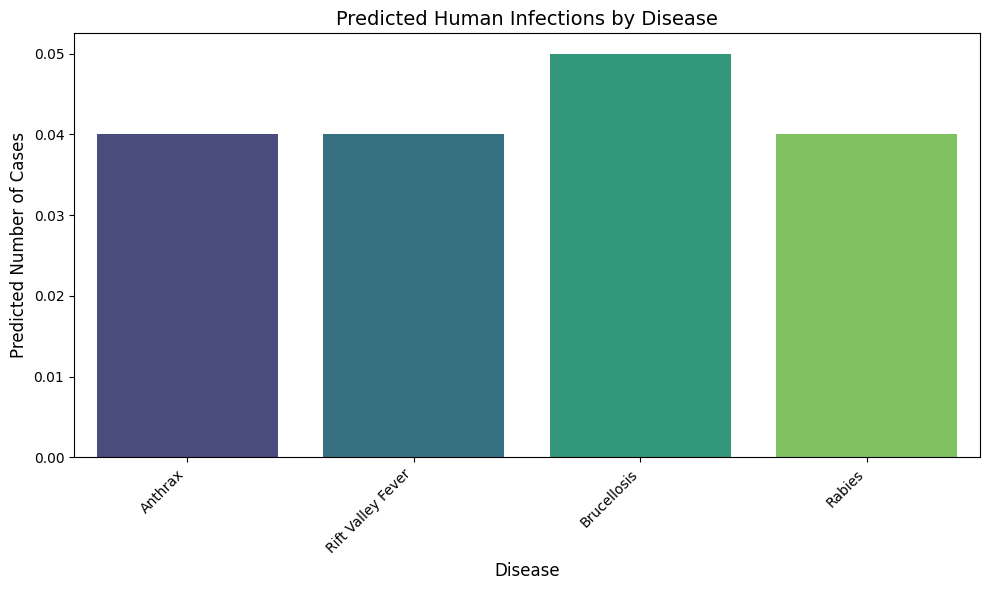

In [58]:
priority_diseases = ["Anthrax", "Rift Valley Fever", "Brucellosis", "Rabies"]

pred_list_adjusted = pred_list[:len(priority_diseases)]
plot_data = pd.DataFrame({'Disease': priority_diseases, 'Predicted Cases': pred_list_adjusted})

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Disease', y='Predicted Cases', palette="viridis")
plt.title("Predicted Human Infections by Disease", fontsize=14)
plt.xlabel("Disease", fontsize=12)
plt.ylabel("Predicted Number of Cases", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
score = model.score(X_test, y_test)
print(f'Model R^2 Score: {score:.2f}')

In [70]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ambarish/kenya-counties-shapefile")

print("Path to dataset files:", path)

100%|██████████| 1.83M/1.83M [00:00<00:00, 135MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ambarish/kenya-counties-shapefile/versions/2


In [71]:

kenya_shapefile = gpd.read_file(path)
kenya_map = folium.Map(location=[data_focus['Latitude'].mean(), data_focus['Longitude'].mean()], zoom_start=6)

folium.Choropleth(
    geo_data=kenya_shapefile,
    name="Disease Distribution",
    data=data_focus,
    columns=["County", "Number Sick"],
    key_on="feature.properties.COUNTY",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number Sick",
).add_to(kenya_map)

for _, row in data_focus.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Disease/ Condition']} in {row['County']}",
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(kenya_map)

kenya_map.save("kenya_disease_map.html")

**Classification Modelling using RandomForestClassifier**

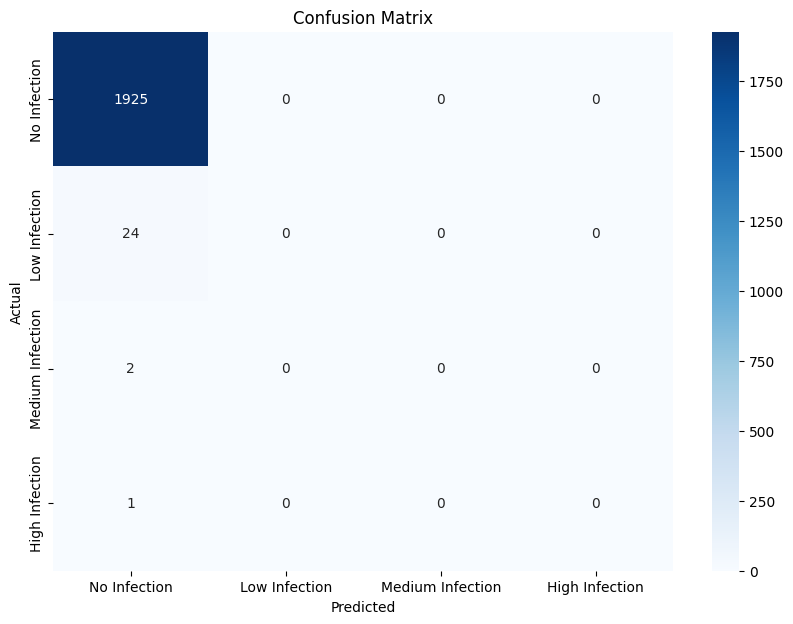

In [60]:
#trying to do classification modelling

# Discretize the target variable
data['Infection_Level'] = pd.cut(data['Number of Humans Affected (If zoonosis)'],
                                  bins=[-1, 0, 10, 50, float('inf')],
                                  labels=['No Infection', 'Low Infection', 'Medium Infection', 'High Infection'])

# Define X and y (using the new categorical target)
X = data[['Number at Risk', 'Number Sick', 'Number Dead', 'Latitude', 'Longitude'] +
         [col for col in data.columns if col.startswith('County_') or col.startswith('Disease/Condition_')]]
y = data['Infection_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['No Infection', 'Low Infection', 'Medium Infection', 'High Infection'])

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Infection', 'Low Infection', 'Medium Infection', 'High Infection'],
            yticklabels=['No Infection', 'Low Infection', 'Medium Infection', 'High Infection'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()